# Improving Deep Learning model Accuracy with imgaug Python Library

The goal of this ipynb tutorial is to demonstrate how to easily improve the classification accuracy of a Deep Learning-based Image Classification model by augmenting the images using the imgaug Python library. 

The model in this tutorial is being trained to classify images for two different Chihuahuas: a black Chihuahua named Scarlett and a white Chihuahua named Pistachio. There are 26 images of Scarlett and 34 images of Pistachio for a total of 60 images. These images are split up randomly into training and validation sets with a ratio of 80-20.

In order to show the effectiveness of image augmentation with improving the classification accuracy, the tutorial will train the same model twice. First, the model will be trained on images with no augmentations, which means that the model will learn how to classify 48 images in the training set, followed by testing its learned accuracy on 12 images in the validation set (images which have not been seen). Next, the model will be trained on images with no augmentations AND with images that are augmentations of the original images. There will be two augmentations applied to each image (separately) which totals to 180 images (143 training set, 37 validation set).

The best accuracy against the validation set for the model with no augments was 63%, while the best validation accuracy for the model with two augments was 100%. Both models were trained for 50 epochs. 

### Loading an image and applying a single augmentation

In order to use the imgaug library, you will need to follow the installation instruction listed on the GitHub repository at [https://github.com/aleju/imgaug](https://github.com/aleju/imgaug). 

Additionally, you'll need to import [Tensorflow](https://www.tensorflow.org/install/pip), [Keras](https://keras.io/), and various other Python library add-ons used in the import statements below. 

Other image processing libraries, such as PIL or OpenCV, can alternatively be used for loading and displaying images.

Images used for training and validation sets have been locally sourced.

In [2]:
# Essential imports needed throughout the tutorial

from imgaug import augmenters as iaa
from keras.preprocessing import image 
import os
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
from keras.applications.resnet50 import ResNet50
from keras.callbacks import ModelCheckpoint
import numpy as np
import pickle
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline

Using TensorFlow backend.


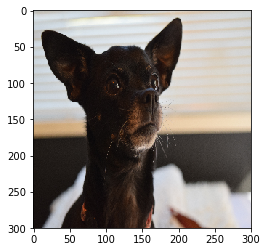

In [2]:
# Loads a single image from path on computer and displays it inside the cell

imagePath = os.path.join('trainingFolders', 'class1', 'DSC_1472.jpg')
img = image.load_img(imagePath, target_size=(300, 300))
plt.imshow(img)

In [3]:
# Converts the image to a 3D numpy array of RGB pixel values
# This step is needed into order to apply augmentations to the image

img = image.img_to_array(img)
img

array([[[199., 207., 210.],
        [197., 207., 209.],
        [199., 207., 209.],
        ...,
        [206., 199., 189.],
        [202., 198., 189.],
        [203., 199., 190.]],

       [[196., 197., 199.],
        [196., 198., 197.],
        [198., 200., 199.],
        ...,
        [203., 202., 197.],
        [203., 202., 197.],
        [203., 202., 198.]],

       [[189., 189., 187.],
        [187., 188., 183.],
        [190., 191., 186.],
        ...,
        [204., 204., 202.],
        [203., 203., 201.],
        [205., 205., 203.]],

       ...,

       [[ 22.,  16.,  16.],
        [ 22.,  16.,  16.],
        [ 19.,  13.,  13.],
        ...,
        [208., 210., 231.],
        [213., 214., 234.],
        [212., 213., 231.]],

       [[ 21.,  15.,  15.],
        [ 23.,  17.,  17.],
        [ 25.,  19.,  19.],
        ...,
        [212., 213., 233.],
        [213., 214., 234.],
        [212., 213., 233.]],

       [[ 23.,  17.,  17.],
        [ 21.,  15.,  15.],
        [ 22.,  

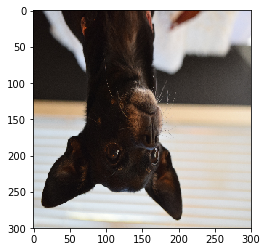

In [4]:
# Applies an augmentation to the image which flips it upside down

aug = iaa.Flipud(1)
aug_img = aug.augment_image(img)
aug_img = image.array_to_img(aug_img)
plt.imshow(aug_img)

In [5]:
# Augmented image is printed in numpy array format to show the change in pixel values

aug_img = image.img_to_array(aug_img)
aug_img

array([[[ 23.,  17.,  17.],
        [ 21.,  15.,  15.],
        [ 22.,  16.,  16.],
        ...,
        [215., 216., 236.],
        [213., 214., 234.],
        [216., 217., 237.]],

       [[ 21.,  15.,  15.],
        [ 23.,  17.,  17.],
        [ 25.,  19.,  19.],
        ...,
        [215., 216., 236.],
        [216., 217., 237.],
        [215., 216., 236.]],

       [[ 22.,  16.,  16.],
        [ 22.,  16.,  16.],
        [ 19.,  13.,  13.],
        ...,
        [211., 213., 234.],
        [216., 217., 237.],
        [215., 216., 234.]],

       ...,

       [[192., 192., 189.],
        [189., 190., 185.],
        [193., 194., 188.],
        ...,
        [207., 207., 205.],
        [206., 206., 204.],
        [208., 208., 206.]],

       [[199., 200., 202.],
        [199., 201., 200.],
        [201., 203., 202.],
        ...,
        [206., 205., 200.],
        [206., 205., 200.],
        [206., 205., 201.]],

       [[202., 210., 213.],
        [200., 210., 212.],
        [202., 2

### The imgaug provides a variety of augmentations

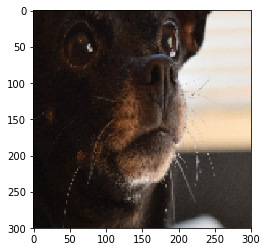

In [6]:
# Adds a Crop to the image

aug = iaa.Crop(80)
aug_img = aug.augment_image(img)
aug_img = image.array_to_img(aug_img)
plt.imshow(aug_img)

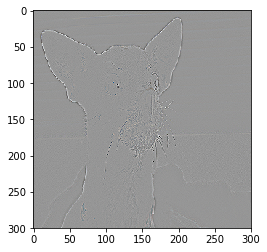

In [7]:
# Adds Edge Highlighting to the image

aug = iaa.EdgeDetect(alpha = 1.0)
aug_img = aug.augment_image(img)
aug_img = image.array_to_img(aug_img)
plt.imshow(aug_img)

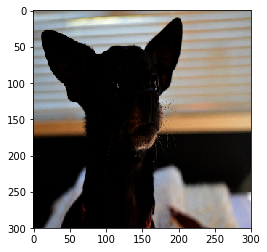

In [8]:
# Adds Contrast to the image

aug = iaa.GammaContrast(gamma=2.5)
aug_img = aug.augment_image(img)
aug_img = image.array_to_img(aug_img)
plt.imshow(aug_img)

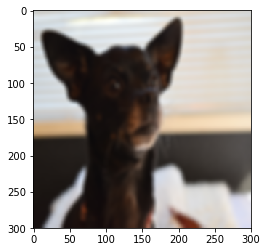

In [9]:
# Adds Blur effect to the image

aug = iaa.GaussianBlur(3.0)
aug_img = aug.augment_image(img)
aug_img = image.array_to_img(aug_img)
plt.imshow(aug_img)

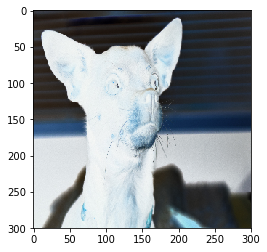

In [10]:
# Adds Inversion to the image pixel values

aug = iaa.Invert(0.5)
aug_img = aug.augment_image(img)
aug_img = image.array_to_img(aug_img)
plt.imshow(aug_img)

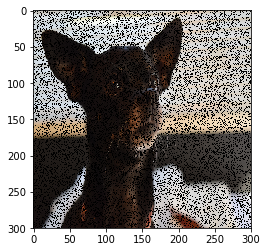

In [11]:
# Adds Dropout (zeroing) of image pixel values

aug = iaa.Dropout(p = 0.25)
aug_img = aug.augment_image(img)
aug_img = image.array_to_img(aug_img)
plt.imshow(aug_img)

### Loading several images and applying several augmentations

This will be the main building block when adding augmentations to the training set.

In [12]:
# Demonstrates how to apply more than 1 augmentation to an image at a time
# Additionally, uses glob to grab multiple images from a folder

seq = iaa.Sequential([
    iaa.Flipud(1), 
    iaa.GaussianBlur(sigma=(0, 5.0)) # blur images within a range of 0 to 5.0
])

imagesPath = os.path.join('trainingFolders', 'class2')
images = []
for imagePath in glob.glob(imagesPath+'/*'):
    img = image.load_img(imagePath, target_size=(300, 300))
    img = image.img_to_array(img)
    images.append(img)

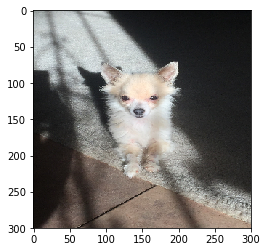

In [13]:
# Plots a selected image from the image array

plt.imshow(image.array_to_img(images[7]))

In [14]:
# Applies 2 augmentations at once to every image in the array

aug_images = seq.augment_images(images)

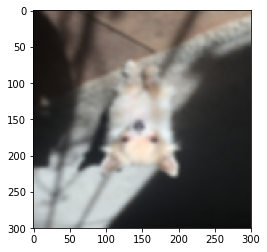

In [15]:
# Displays the previously selected image with augmentations applied

plt.imshow(image.array_to_img(aug_images[7]))

### Augmenting the Training Set of Images

In [3]:
# Grabs images from multiple class folders and creates training and validation sets

imageFoldersPath = os.path.join('trainingFolders')
trainingFolders = []

for folderPath in glob.glob(imageFoldersPath+'/*'):
    trainingFolders.append(folderPath)

# Essential arrays needed for training. "x" variables contain images while "y" variables contain folder (class) names
x_train = [] 
x_val = [] 
y_train = [] 
y_val = [] 

# Augments are applied separately
augments = [iaa.Flipud(1.0), iaa.GaussianBlur(sigma=(0, 5.0))] 

includeAugments = True

# Goes through each folder in trainingFolders directory to store images in variables
for folder in trainingFolders:
    x = []
    y = []
    for imagePath in glob.glob(folder+'/*'):
        img = image.load_img(imagePath, target_size=(224, 224))
        img = image.img_to_array(img)
        x.append(img)
        y.append(folder)
        
        # If true, augments are applied to current image and appended to x variable
        if includeAugments == True:
            for aug in augments:
                aug_img = aug.augment_image(img)
                x.append(aug_img)
                y.append(folder)
    
    # Splits the x and y variables randomly (but equally) in 80-20 ratio for training and validation sets
    x_train_class, x_val_class, y_train_class, y_val_class = train_test_split(x, y, test_size=0.2)
    
    # Values are appended in a fashion that will include all classes and index in x corresponds to index in y
    for img_array in x_train_class:
        x_train.append(img_array)
    for img_array in x_val_class:
        x_val.append(img_array)
        
    for class_name in y_train_class:
        y_train.append(class_name)
    for class_name in y_val_class:
        y_val.append(class_name)

In [4]:
# Creates new y_val and y_train variables that are "one-hot" encoded based on unique class names
#
# Example:
# y_val = [[0, 1]
#          [1, 0]
#          [1, 0]
#          [0, 1]
#          [1, 0]]

oneHotFitVal = pd.get_dummies(y_val)
y_val_onehot = oneHotFitVal.as_matrix()

oneHotFitTrain = pd.get_dummies(y_train)
y_train_onehot = oneHotFitTrain.as_matrix()

C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [ ]:
# Fits a Deep Learning model (ResNet50) to the training data and then generates validation set accuracy
# Mode is trained for 50 epochs, meaning the model sees the training data and adjusts weights accordingly 50 times

numClasses = len(trainingFolders)
model = ResNet50(weights=None, include_top ='True', classes=numClasses)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
results = model.fit(x = np.array(x_train), y = np.array(y_train_onehot), 
                    validation_data = (np.array(x_val), np.array(y_val_onehot)), epochs=50, verbose=1)

Train on 143 samples, validate on 37 samples
Epoch 1/50
143/143 [==============================] - 15s 106ms/step - loss: 1.7191 - acc: 0.6503 - val_loss: 6.9255 - val_acc: 0.5676
Epoch 2/50
143/143 [==============================] - 2s 13ms/step - loss: 1.2752 - acc: 0.6573 - val_loss: 7.7573 - val_acc: 0.4324
Epoch 3/50
143/143 [==============================] - 2s 13ms/step - loss: 0.4593 - acc: 0.8252 - val_loss: 6.7034 - val_acc: 0.5676
Epoch 4/50
143/143 [==============================] - 2s 13ms/step - loss: 0.3338 - acc: 0.8601 - val_loss: 8.4325 - val_acc: 0.4324
Epoch 5/50
143/143 [==============================] - 2s 13ms/step - loss: 0.2017 - acc: 0.9510 - val_loss: 4.4184 - val_acc: 0.6216
Epoch 6/50
143/143 [==============================] - 2s 13ms/step - loss: 0.1088 - acc: 0.9650 - val_loss: 3.2114 - val_acc: 0.7027
Epoch 7/50
143/143 [==============================] - 2s 13ms/step - loss: 0.0471 - acc: 0.9860 - val_loss: 3.1615 - val_acc: 0.7297
Epoch 8/50
143/143 [==

In [21]:
# Saves the results of the model training (for both experiments) to pickle file for plotting later

if not os.path.isdir('results'):
    os.mkdir('results')

if includeAugments == True:
    with open(os.path.join('results', 'augshistory.pkl'), 'wb') as file_pi:         
        pickle.dump(results.history, file_pi)
else:
    with open(os.path.join('results', 'noaugshistory.pkl'), 'wb') as file_pi:         
        pickle.dump(results.history, file_pi)

### Comparing the Results of Non-Aug v.s. Aug models

In [22]:
# Generates the class prediction confidence for each image in the validation data and prints it

predictions = model.predict(np.array(x_val))
predictions

array([[2.3168068e-04, 9.9976832e-01],
       [4.3789342e-10, 1.0000000e+00],
       [1.0339179e-06, 9.9999893e-01],
       [1.5637210e-05, 9.9998438e-01],
       [5.3170012e-12, 1.0000000e+00],
       [5.1013432e-10, 1.0000000e+00],
       [3.5848682e-08, 1.0000000e+00],
       [1.8698902e-18, 1.0000000e+00],
       [4.2259887e-01, 5.7740110e-01],
       [9.8005914e-10, 1.0000000e+00],
       [1.7069192e-09, 1.0000000e+00],
       [4.0648805e-04, 9.9959356e-01],
       [2.8645277e-13, 1.0000000e+00]], dtype=float32)

Actual:  Scarlett
Predicted:  [('Scarlett', 5.101343e-10), ('Pistachio', 1.0)]


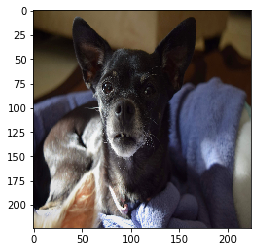

In [24]:
# Compares the actual class to the predicted class for the images

classDictionary = {}
classes = []

for line in open('classMappings.txt'):
    className = line.split()[0]
    classDescription = line.split()[1]
    
    classDictionary[className] = classDescription
    
for key in classDictionary.keys():
    classes.append(key)

tot = []
for i in predictions:
    tups = []
    for j in range(0,2):
        tups.append((classDictionary[classes[j]], i[j]))
    tot.append(tups)
        
index = 5

actualOutput = classDictionary[y_val[index]]

img = image.array_to_img(x_val[index])
plt.imshow(img)
print('Actual: ', actualOutput)
print('Predicted: ', tot[index])

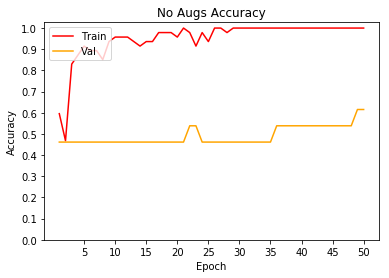

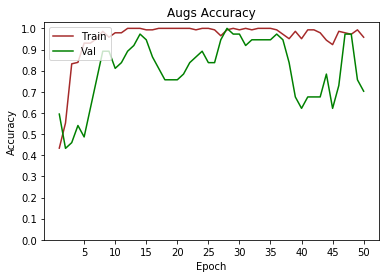

In [20]:
# Plots the separate experiment results
# X-axis represents accuracy (0.0 -> 1.0)
# Y-axis represents epoch (0 -> 50)
# Training and validation accuracies are both plotted

noaugs = None
augs = None

with open (os.path.join('results', 'noaugshistory.pkl'), 'rb') as fp:     
    noaugs = pickle.load(fp)
with open (os.path.join('results', 'augshistory.pkl'), 'rb') as fp:     
     augs = pickle.load(fp)   

epochs = 50

x = np.arange(epochs)+1
plt.plot(x, noaugs['acc'], color = 'red')
plt.plot(x, noaugs['val_acc'], color = 'orange')
plt.title('No Augs Accuracy')
plt.ylabel('Accuracy')
plt.yticks([0.1*i for i in range(0, 11)])
plt.xticks([5*i for i in range(1, 11)])
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

x = np.arange(epochs)+1
plt.plot(x, augs['acc'], color = 'brown')
plt.plot(x, augs['val_acc'], color = 'green')
plt.title('Augs Accuracy')
plt.ylabel('Accuracy')
plt.yticks([0.1*i for i in range(0, 11)])
plt.xticks([5*i for i in range(1, 11)])
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()